### Import libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Load inputs

In [75]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

### EDA

In [59]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [60]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [61]:
sample_sub.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
ID                         59310 non-null object
Estimated_Insects_Count    59310 non-null int64
Crop_Type                  59310 non-null int64
Soil_Type                  59310 non-null int64
Pesticide_Use_Category     59310 non-null int64
Number_Doses_Week          59310 non-null int64
Number_Weeks_Used          53417 non-null float64
Number_Weeks_Quit          59310 non-null int64
Season                     59310 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


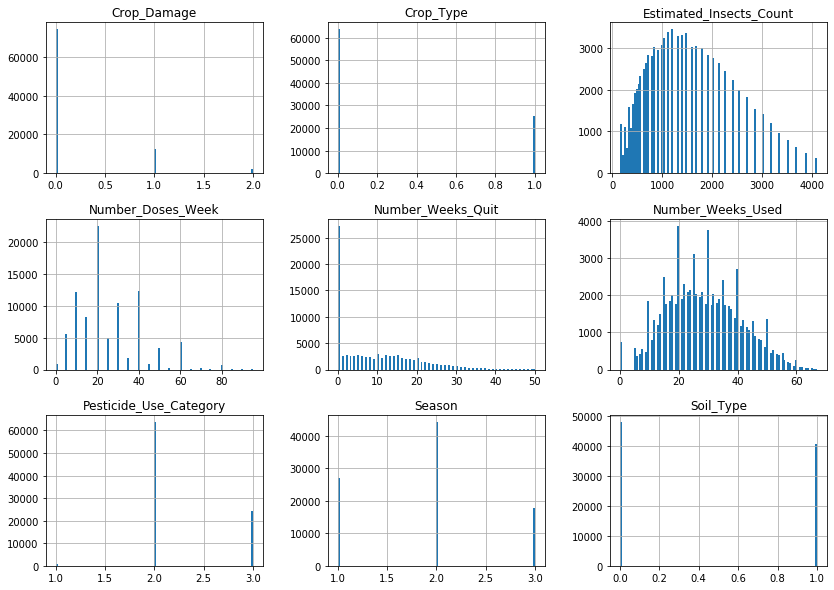

In [64]:
# fig,ax = plt.subplots(figsize =(10,10))
train.hist(figsize = (14,10),bins = 100)
plt.show()

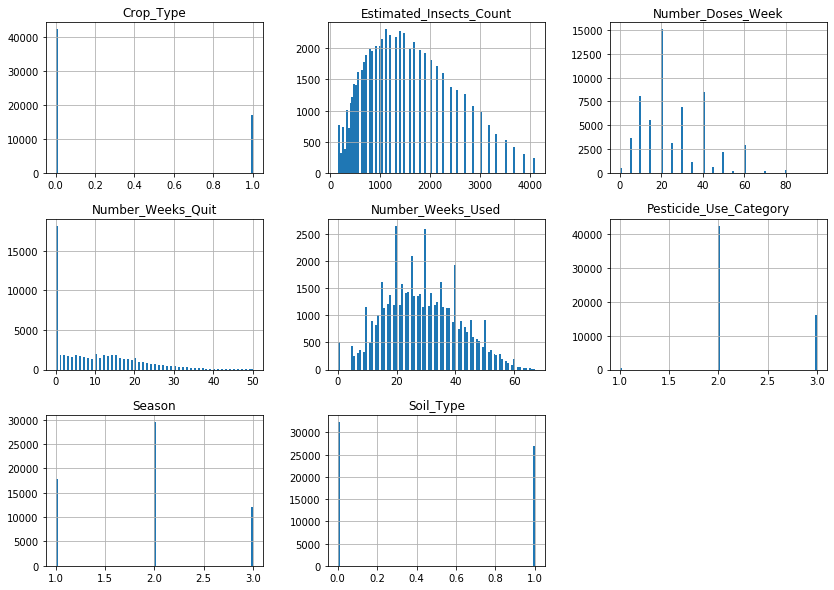

In [65]:
test.hist(figsize = (14,10),bins = 100)
plt.show()

### One-ways

In [227]:
train['missing_used_weeks'] = 0
train.loc[train.Number_Weeks_Used.isna(),'missing_used_weeks'] =1
train['id'] = train['ID'].str.replace('F','').astype('int')

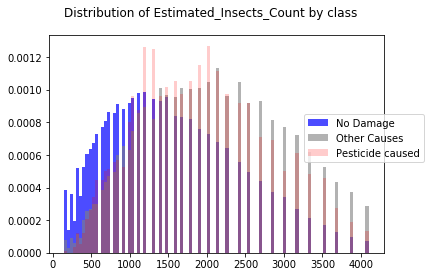

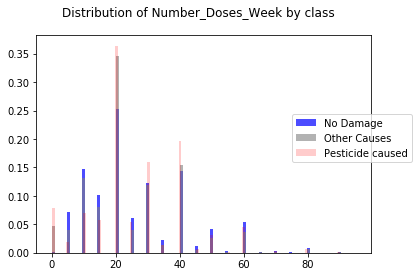

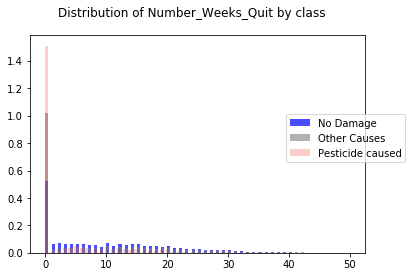

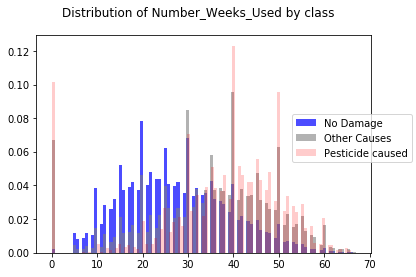

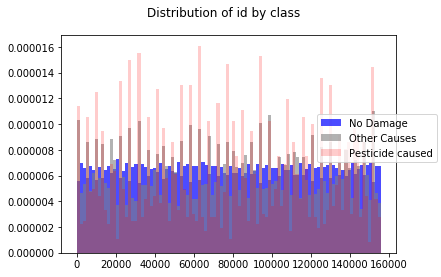

In [161]:
numeric_columns =['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit',
                  'Number_Weeks_Used','id']
fig = {}
ax = {}
for i,col in enumerate(numeric_columns):
    fig[i] = plt.figure()
    ax[i] = plt.hist(train[col][train.Crop_Damage==0],bins = 100 , label ='No Damage', color = 'blue',alpha =0.7, density = True)
    ax[i] = plt.hist(train[col][train.Crop_Damage==1],bins =100 , label ='Other Causes', color = 'grey',alpha =0.6, density = True)
    ax[i] = plt.hist(train[col][train.Crop_Damage==2],bins =100 , label ='Pesticide caused', color = 'red',alpha =0.2,density = True)
    fig[i].suptitle('Distribution of '+ col+ ' by class')
    fig[i].legend(loc = 'right')
#     print(train[col].count())

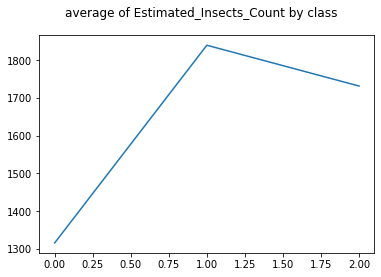

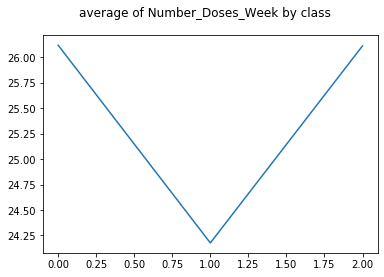

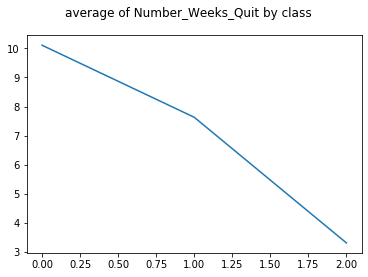

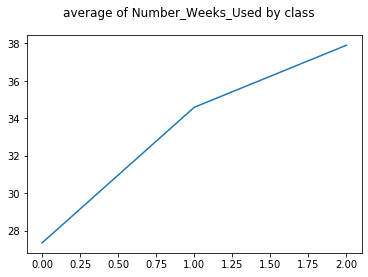

In [68]:
numeric_columns =['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit',
                  'Number_Weeks_Used']
fig = {}
ax = {}
for i,col in enumerate(numeric_columns):
    grouped = train.groupby('Crop_Damage')[col].mean().reset_index()
    fig[i] = plt.figure()
    ax[i] = plt.plot( grouped['Crop_Damage'], grouped[col])
    fig[i].suptitle('average of '+ col+ ' by class')

In [97]:
train.groupby('Crop_Damage')['ID'].count().reset_index()

,Crop_Damage,ID
0,0,74238
1,1,12307
2,2,2313


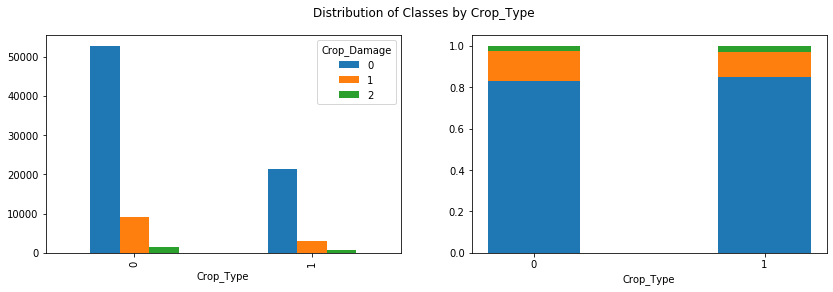

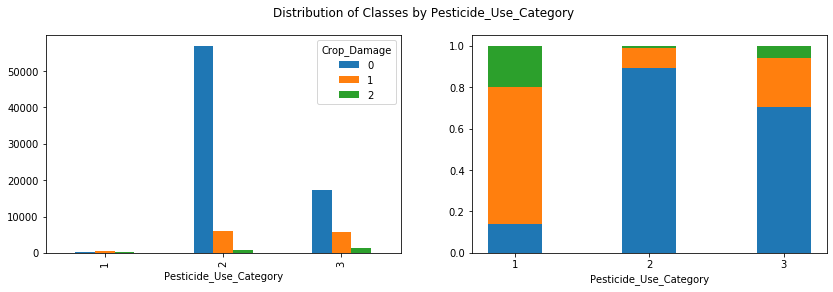

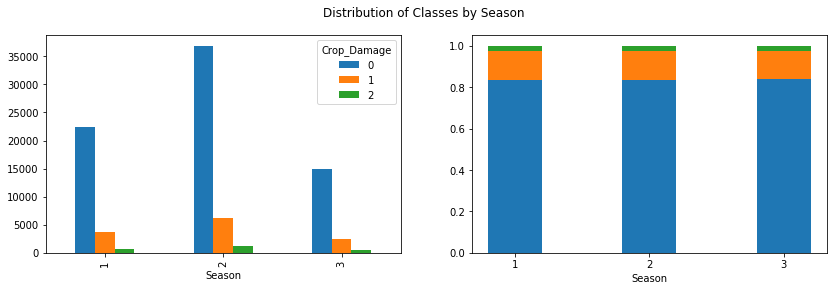

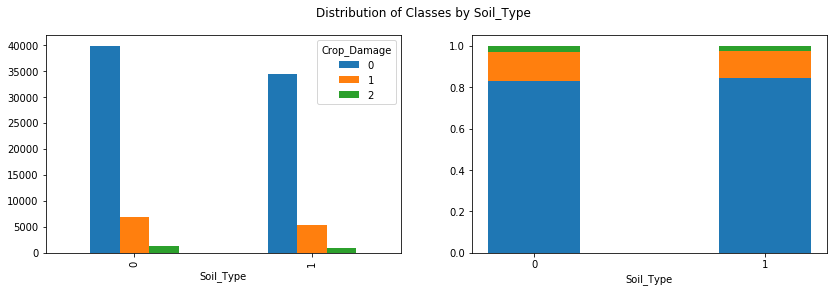

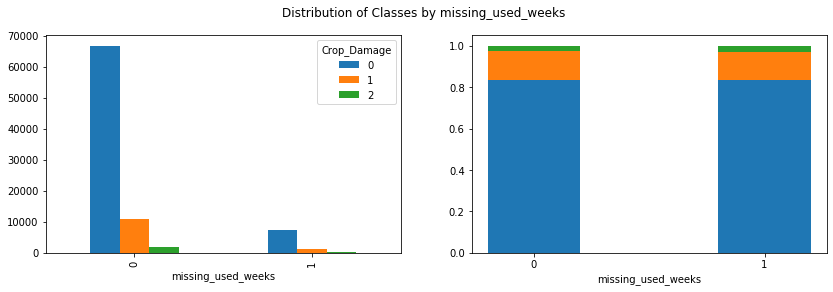

In [151]:
categorical_cols = ['Crop_Type','Pesticide_Use_Category','Season','Soil_Type','missing_used_weeks']

for i, col in enumerate(categorical_cols):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
    train.groupby([col,'Crop_Damage'])['ID'].count().unstack().plot.bar(ax = ax1)
    grouped = train.groupby([col,'Crop_Damage'])['ID'].count().reset_index()
    grouped['height'] = grouped['ID'] / grouped.groupby(col)['ID'].transform(sum)
    bottom = 0
    for lab in grouped.Crop_Damage.unique():
        x = grouped.loc[grouped.Crop_Damage==lab,col].astype('str')
        h = grouped.loc[grouped.Crop_Damage==lab,'height'] 
        ax2.bar(x,h, label = lab ,width =0.4, bottom = bottom) 
        ax2.set_xlabel(col)
        bottom = bottom + h.values
    fig.suptitle('Distribution of Classes by '+ col )


In [228]:
train.groupby('Crop_Damage')['id'].mean().reset_index()

,Crop_Damage,id
0,0,78127.564212
1,1,77173.523279
2,2,77283.288802


In [76]:
train['missing_used_weeks'] = 0
train.loc[train.Number_Weeks_Used.isna(),'missing_used_weeks'] =1

train['id'] = train['ID'].str.replace('F','').astype('int')

pest_cats = pd.get_dummies(train.Pesticide_Use_Category)
pest_cats.columns = ('never','previously_used','currently_using')
train = train.join(pest_cats)

train.loc[ (train.Number_Weeks_Used.isna()) & (train.Pesticide_Use_Category ==1),'Number_Weeks_Used'] = 0

In [77]:
test['missing_used_weeks'] = 0
test.loc[test.Number_Weeks_Used.isna(),'missing_used_weeks'] =1

test['id'] = test['ID'].str.replace('F','').astype('int')

pest_cats = pd.get_dummies(test.Pesticide_Use_Category)
pest_cats.columns = ('never','previously_used','currently_using')
test = test.join(pest_cats)

test.loc[ (test.Number_Weeks_Used.isna()) & (test.Pesticide_Use_Category ==1),'Number_Weeks_Used'] = 0

In [78]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10, weights="uniform", missing_values = np.NaN)
imputer.fit(train.drop(['ID','Crop_Damage'],axis =1))
# train_imputed= imputer.fit_transform()

train.loc[:,list(train.drop(['ID','Crop_Damage'],axis =1).columns)] = imputer.transform(train.drop(['ID','Crop_Damage'],
                                                                                               axis =1))

test.loc[:,list(test.drop(['ID'],axis =1).columns)] = imputer.transform(test.drop(['ID'], axis =1))

### add basic features

In [79]:
train['doses_week_insects'] = train['Number_Doses_Week']/train['Estimated_Insects_Count']
train['used_per_quit_ratio'] = train['Number_Weeks_Used'] / train['Number_Weeks_Quit']
train['doses'] = train['Number_Doses_Week'] * train['Number_Weeks_Used']
train['doses_per_insect_count'] = train['doses']/train['Estimated_Insects_Count']
train['used_weeks_per_insects'] = train['Number_Weeks_Used']/train['Estimated_Insects_Count']

train.loc[(train.Number_Weeks_Used >0) & (train.Number_Weeks_Quit ==0 ) , 'used_per_quit_ratio'] = (
    train.loc[(train.Number_Weeks_Used >0) & (train.Number_Weeks_Quit ==0 ) , 'Number_Weeks_Used'])

train.loc[(train.Number_Weeks_Used == 0) & (train.used_per_quit_ratio==0),'used_per_quit_ratio'] = 0


test['doses_week_insects'] = test['Number_Doses_Week']/test['Estimated_Insects_Count']
test['used_per_quit_ratio'] = test['Number_Weeks_Used'] / test['Number_Weeks_Quit']
test['doses'] = test['Number_Doses_Week'] * test['Number_Weeks_Used']
test['doses_per_insect_count'] = test['doses']/test['Estimated_Insects_Count']
test['used_weeks_per_insects'] = test['Number_Weeks_Used']/test['Estimated_Insects_Count']

test.loc[(test.Number_Weeks_Used >0) & (test.Number_Weeks_Quit ==0 ) , 'used_per_quit_ratio'] = (
    test.loc[(test.Number_Weeks_Used >0) & (test.Number_Weeks_Quit ==0 ) , 'Number_Weeks_Used'])

test.loc[(test.Number_Weeks_Used == 0) & (test.used_per_quit_ratio==0),'used_per_quit_ratio'] = 0

In [7]:
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,missing_used_weeks,id,never,previously_used,currently_using,doses_week_insects,used_per_quit_ratio,doses,doses_per_insect_count,used_weeks_per_insects
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.445555,0.299279,0.002304,0.202888,-0.006153,0.002012,0.028904,0.069512,-0.076502,-0.547677,0.070904,0.147222,-0.461565,-0.633076
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.047211,-0.233394,0.002161,-0.016495,0.003607,0.005711,0.058619,-0.266833,0.256921,-0.014147,0.170732,-0.159589,-0.040942,0.085247
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.069585,0.009364,0.002327,-0.021997,-0.006494,0.005505,0.008723,-0.037217,0.035716,0.067678,-0.007511,0.018709,0.047080,0.014073
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.353390,-0.554169,0.002811,0.175002,-0.004093,-0.017437,-0.266966,-0.910593,0.977956,0.117884,0.782422,0.139532,0.204546,0.339563
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.122037,-0.037131,-0.001401,-0.030874,0.000301,-0.003138,-0.162061,0.073089,-0.038738,0.556928,-0.005054,0.825630,0.669999,0.148301
Number_Weeks_Used,0.445555,-0.047211,-0.069585,0.353390,0.122037,1.000000,-0.427228,0.004189,0.229182,-0.000804,-0.009360,-0.231175,-0.263111,0.315951,-0.215017,0.646140,0.567452,0.073047,0.060449
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.427228,1.000000,0.000595,-0.133117,-0.000195,0.011603,-0.094455,0.608580,-0.594474,-0.227112,-0.697984,-0.252249,-0.353589,-0.506538
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004189,0.000595,1.000000,-0.000184,0.002200,-0.005281,-0.006604,-0.000049,0.001480,-0.006902,0.001811,-0.000088,-0.004811,-0.004418
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.229182,-0.133117,-0.000184,1.000000,0.003855,-0.007178,0.185833,-0.259090,0.221533,-0.129480,0.265601,0.111975,-0.057824,-0.076840
missing_used_weeks,-0.006153,0.003607,-0.006494,-0.004093,0.000301,-0.000804,-0.000195,0.002200,0.003855,1.000000,0.001673,0.004720,0.002171,-0.003217,0.004274,-0.014181,-0.007592,-0.001228,0.003731


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [10]:
exclusions = ['ID','Pesticide_Use_Category','id','Crop_Damage']

test_exclusions  = ['ID','Pesticide_Use_Category','id']


X_train_CV = train.drop(exclusions,axis=1)
y_train_CV = train['Crop_Damage']

param = {
    'learning_rate': 0.05, 
    'max_depth': 5,  
    'colsample_bytree': 1,
    'subsample': 0.9,
    'min_child_weight': 20,
    'objective': 'multi:softprob',
    'booster': 'gbtree',
    'verbosity': 1,
    'random_state': 0,
    'n_estimators' : 500
    } 


xgb_classifier = xgb.XGBClassifier(**param)

cv_scores_xgb = cross_val_score(xgb_classifier, X_train_CV, y_train_CV, scoring='accuracy', cv=5,verbose = 1)

print(cv_scores_xgb)

# rf_classifier =  RandomForestClassifier(n_estimators=500,
#                                         max_depth = 5,
#                                         min_samples_leaf = 10,
#                                         oob_score = True,
#                                         random_state=0)
#            
# cv_scores_rf = cross_val_score(rf_classifier,X_train_CV.fillna(-999), y_train_CV, scoring='accuracy', cv=5,verbose = 1)
# print(cv_scores_rf)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.8472316  0.84852577 0.84559982 0.84632266 0.84452197]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.7min finished


In [80]:

np.random.seed(0)
train['holdout'] = np.random.random(len(train.index))
train.loc[train.holdout > 0.75,'holdout'] = 1
train.loc[train.holdout <= 0.75,'holdout'] = 0

holdout = train.loc[train.holdout ==1 , :].drop('holdout',axis =1)
train_ = train.loc[train.holdout == 0 , :].drop('holdout',axis =1)

X_train, X_validate, Y_train, Y_validate = train_test_split(train_.drop(exclusions,axis=1),
                                                    train_['Crop_Damage'], test_size=0.33,random_state = 1)

X_holdout = holdout.drop(exclusions,axis =1)
Y_holdout = holdout['Crop_Damage']

print(X_train.shape)
print(X_validate.shape)
print(X_holdout.shape)

xgb_classifier = xgb.XGBClassifier(**param)


xgb_classifier.fit(X_train,Y_train, eval_set=[(X_validate, Y_validate)],
               eval_metric=['mlogloss'],
#                sample_weight = generate_weights_array(Y_train,weights),
               early_stopping_rounds = 50,
               verbose=50)


(44680, 16)
(22008, 16)
(22170, 16)
[0]	validation_0-mlogloss:1.07996
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[50]	validation_0-mlogloss:0.61440
[100]	validation_0-mlogloss:0.49196
[150]	validation_0-mlogloss:0.45332
[200]	validation_0-mlogloss:0.43868
[250]	validation_0-mlogloss:0.43228
[300]	validation_0-mlogloss:0.42901
[350]	validation_0-mlogloss:0.42692
[400]	validation_0-mlogloss:0.42547
[450]	validation_0-mlogloss:0.42436
[500]	validation_0-mlogloss:0.42357
[550]	validation_0-mlogloss:0.42291
[600]	validation_0-mlogloss:0.42242
[650]	validation_0-mlogloss:0.42199
[700]	validation_0-mlogloss:0.42169
[750]	validation_0-mlogloss:0.42142
[800]	validation_0-mlogloss:0.42116
[850]	validation_0-mlogloss:0.42096
[900]	validation_0-mlogloss:0.42080
[950]	validation_0-mlogloss:0.42062
[999]	validation_0-mlogloss:0.42053


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=20, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=1)

### Get feature importances

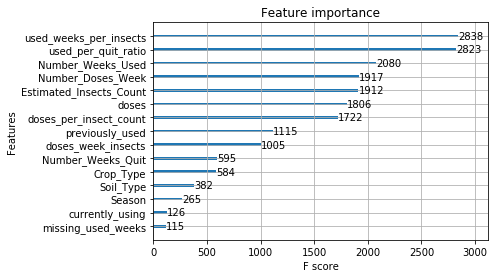

In [81]:
xgb.plot_importance(xgb_classifier.get_booster())

### Evaluation

#### Check distribution of predicted vs actual classes

In [82]:
validate_preds = xgb_classifier.predict_proba(X_validate)
holdout_preds = xgb_classifier.predict_proba(X_holdout)

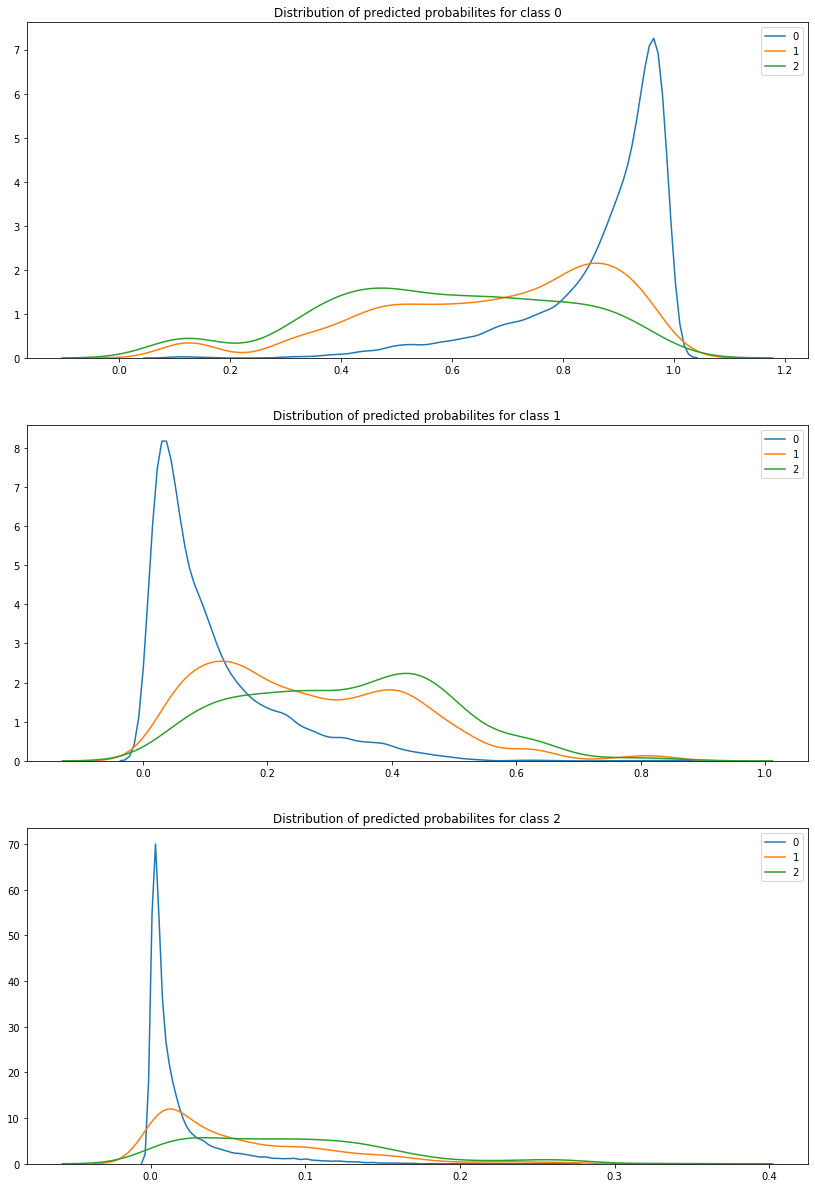

In [83]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows =3, ncols =1, figsize = (14,21))
sns.distplot(validate_preds[:,0][Y_validate== 0],label = xgb_classifier.classes_[0],ax = ax1,hist = False,bins =100)
sns.distplot(validate_preds[:,0][Y_validate== 1],label = xgb_classifier.classes_[1],ax = ax1,hist = False,bins =100)
sns.distplot(validate_preds[:,0][Y_validate== 2],label = xgb_classifier.classes_[2],ax = ax1,hist = False,bins =100)
ax1.legend(loc = 'upper right')
ax1.set_title('Distribution of predicted probabilites for class 0')
sns.distplot(validate_preds[:,1][Y_validate== 0],label = xgb_classifier.classes_[0],ax = ax2,hist = False,bins =100)
sns.distplot(validate_preds[:,1][Y_validate== 1],label = xgb_classifier.classes_[1],ax = ax2,hist = False,bins =100)
sns.distplot(validate_preds[:,1][Y_validate== 2],label = xgb_classifier.classes_[2],ax = ax2,hist = False,bins =100)
ax2.legend(loc = 'upper right')
ax2.set_title('Distribution of predicted probabilites for class 1')
sns.distplot(validate_preds[:,2][Y_validate== 0],label = xgb_classifier.classes_[0],ax = ax3,hist = False,bins =100)
sns.distplot(validate_preds[:,2][Y_validate== 1],label = xgb_classifier.classes_[1],ax = ax3,hist = False,bins =100)
sns.distplot(validate_preds[:,2][Y_validate == 2],label = xgb_classifier.classes_[2],ax = ax3,hist = False,bins =100)
ax3.legend(loc = 'upper right')
ax3.set_title('Distribution of predicted probabilites for class 2')
# fig.suptitle('Distribution of predicted probabilities by True labels')
plt.show()

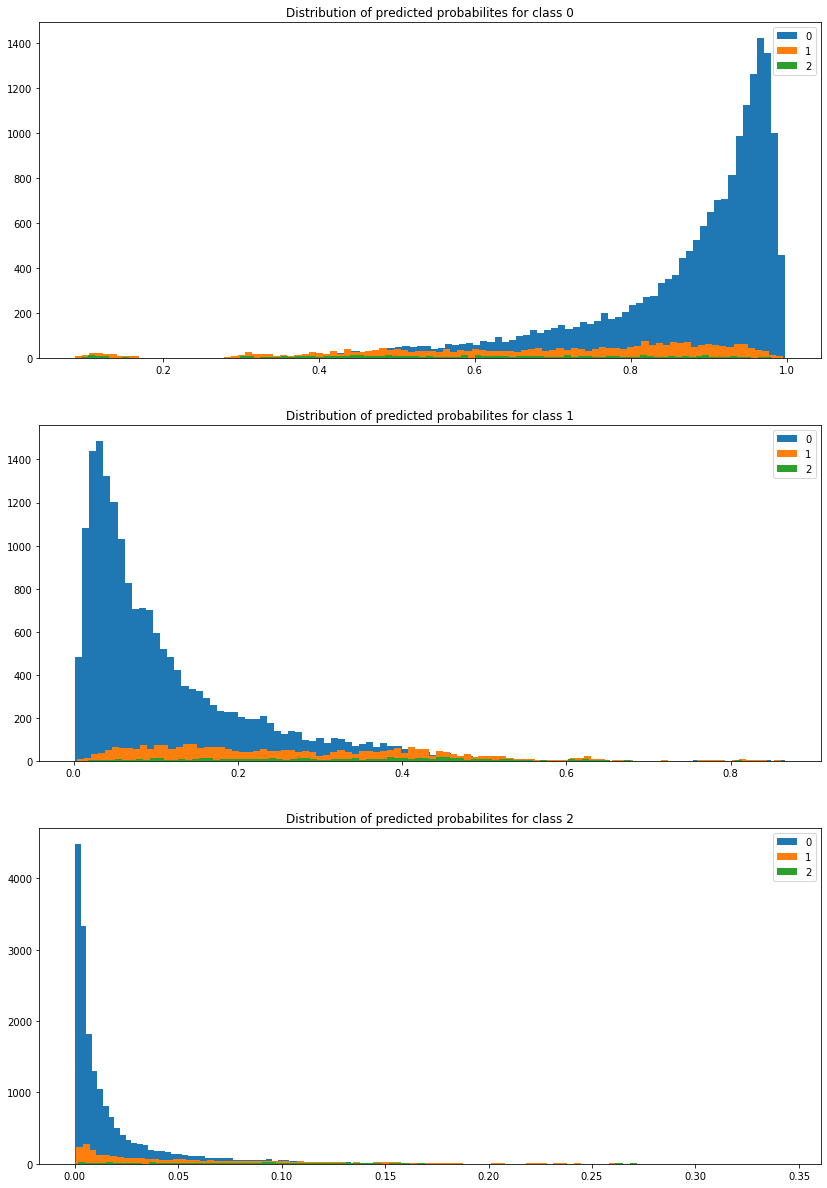

In [84]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows =3, ncols =1, figsize = (14,21))
ax1.hist(validate_preds[:,0][Y_validate== 0],label = xgb_classifier.classes_[0],bins =100)
ax1.hist(validate_preds[:,0][Y_validate== 1],label = xgb_classifier.classes_[1],bins =100)
ax1.hist(validate_preds[:,0][Y_validate== 2],label = xgb_classifier.classes_[2],bins =100)
ax1.legend(loc = 'upper right')
ax1.set_title('Distribution of predicted probabilites for class 0')
ax2.hist(validate_preds[:,1][Y_validate== 0],label = xgb_classifier.classes_[0],bins =100)
ax2.hist(validate_preds[:,1][Y_validate== 1],label = xgb_classifier.classes_[1],bins =100)
ax2.hist(validate_preds[:,1][Y_validate== 2],label = xgb_classifier.classes_[2],bins =100)
ax2.legend(loc = 'upper right')
ax2.set_title('Distribution of predicted probabilites for class 1')
ax3.hist(validate_preds[:,2][Y_validate== 0],label = xgb_classifier.classes_[0],bins =100)
ax3.hist(validate_preds[:,2][Y_validate== 1],label = xgb_classifier.classes_[1],bins =100)
ax3.hist(validate_preds[:,2][Y_validate== 2],label = xgb_classifier.classes_[2],bins =100)
ax3.legend(loc = 'upper right')
ax3.set_title('Distribution of predicted probabilites for class 2')
plt.show()


### Confusion matrix with "Predict" method

Baseline accuracy - 0.8345060893098782
Accuracy on validation set - 0.8470556161395856
Accuracy on holdout set - 0.8446098331078034


Text(0.5, 1, 'holdout')

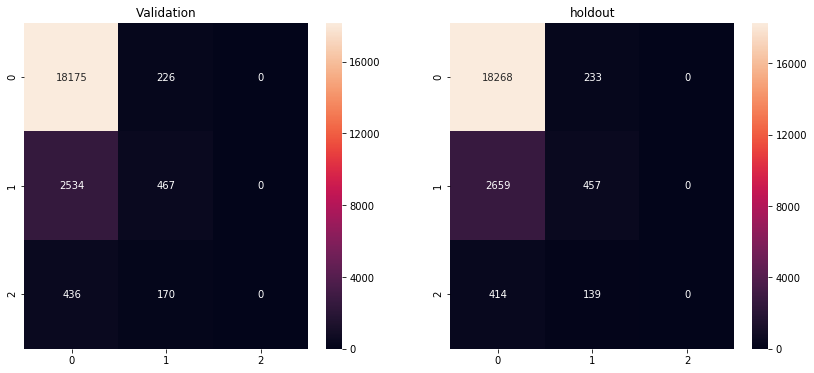

In [85]:
validate_preds = xgb_classifier.predict(X_validate)
holdout_preds = xgb_classifier.predict(X_holdout)

accuracy_baseline = accuracy_score(Y_holdout,np.full(len(Y_holdout),0))

accuracy_validation = accuracy_score(Y_validate,validate_preds)
accuracy_holdout = accuracy_score(Y_holdout,holdout_preds)

print('Baseline accuracy - ' +str(accuracy_baseline))
print('Accuracy on validation set - ' + str(accuracy_validation))
print('Accuracy on holdout set - ' +str(accuracy_holdout))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

cm_validate = confusion_matrix(Y_validate,validate_preds)
sns.heatmap(cm_validate,annot=True,fmt = 'd',cbar=True,ax = ax1)
ax1.set_title('Validation')

cm_holdout = confusion_matrix(Y_holdout,holdout_preds)
sns.heatmap(cm_holdout,annot=True,fmt = 'd',cbar=True, ax = ax2)
ax2.set_title('holdout')


### Rule based classifier based on outputs from predict_proba

Accuracy on validation set - 0.823973100690658
Accuracy on validation set - 0.8230942715381145


Text(0.5, 1, 'holdout')

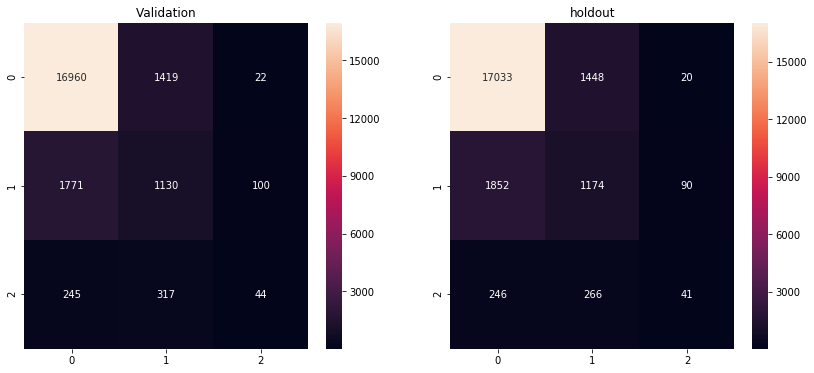

In [86]:
#rule based classifier
def classify_crop_damage(preds):
    prob_0 = preds[:,0]
    prob_1 = preds[:,1]
    prob_2 = preds[:,2]
    scores = np.full(len(prob_0),0)
    scores[prob_0<0.65] = 1
    scores[prob_0<(prob_1+prob_2)] = 1
    scores[prob_2>0.2] = 2
    return(scores)

print('Accuracy on validation set - ' + str(accuracy_score(Y_validate,
                                                           classify_crop_damage(xgb_classifier.predict_proba(X_validate)))))
print('Accuracy on validation set - ' + str(accuracy_score(Y_holdout,
                                                           classify_crop_damage(xgb_classifier.predict_proba(X_holdout)))))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

cm_validate = confusion_matrix(Y_validate,classify_crop_damage(xgb_classifier.predict_proba(X_validate)))
sns.heatmap(cm_validate,annot=True,fmt = 'd',cbar=True,ax = ax1)
ax1.set_title('Validation')


cm_validate = confusion_matrix(Y_holdout,classify_crop_damage(xgb_classifier.predict_proba(X_holdout)))
sns.heatmap(cm_validate,annot=True,fmt = 'd',cbar=True, ax = ax2)
ax2.set_title('holdout')

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows =3, ncols =1, figsize = (14,21))
ax1.hist(validate_preds[:,0][Y_validate== 0],label = xgb_classifier.classes_[0],bins =100)
ax1.hist(validate_preds[:,1][Y_validate== 0],label = xgb_classifier.classes_[1],bins =100)
ax1.hist(validate_preds[:,2][Y_validate== 0],label = xgb_classifier.classes_[2],bins =100)
ax1.legend(loc = 'upper right')
ax2.hist(validate_preds[:,0][Y_validate== 1],label = xgb_classifier.classes_[0],bins =100)
ax2.hist(validate_preds[:,1][Y_validate== 1],label = xgb_classifier.classes_[1],bins =100)
ax2.hist(validate_preds[:,2][Y_validate== 1],label = xgb_classifier.classes_[2],bins =100)
ax2.legend(loc = 'upper right')
ax3.hist(validate_preds[:,0][Y_validate== 2],label = xgb_classifier.classes_[0],bins =100)
ax3.hist(validate_preds[:,1][Y_validate== 2],label = xgb_classifier.classes_[1],bins =100)
ax3.hist(validate_preds[:,2][Y_validate== 2],label = xgb_classifier.classes_[2],bins =100)
ax3.legend(loc = 'upper right')



### Ideas for improvement
1. Try rebalancing predicted classes
2. CalibratedClassifer
3. Oversample from minority class
4. Try regression
5. Try binary prediction for damage/not

Predictions made by adjusting predict_proba to balance classes

In [88]:
#rebalancing predicted classes using adjustments in logit transformation

def adjusted_probability(prob,factor):
    prob = np.log(prob/(1-prob))
    prob = 1/(1+np.exp(-prob-factor))
    return(prob)

def adjusted_preds(clf,features,adjustment_factors):
    proba = clf.predict_proba(features)
    for i,factor in enumerate(adjustment_factors):
        proba[:,i] = adjusted_probability(proba[:,i],factor)
    proba = pd.DataFrame(proba,columns = clf.classes_)
    predicted_labels = np.array(proba.idxmax(axis = 1))
    return(predicted_labels)
    

In [ ]:

import time

start = time.time()


adj1 = 0
adj2 = np.arange(0,1,0.05).tolist()
adj3 = np.arange(0,1,0.05).tolist()
df = []
for i in adj2:
    for j in adj3:
        accuracy = accuracy_score(Y_validate,adjusted_preds(xgb_classifier,X_validate,[adj1,j,k]))
        df.append(pd.DataFrame([[adj1,i,j,accuracy]],columns = ['adj1','adj2','adj3','accuracy']))

df = pd.concat(df)
df.sort_values('accuracy',ascending = False)

end = time.time()
print(end - start)



In [ ]:
df.sort_values('accuracy',ascending = False).head(10)

Accuracy on validation -0.8393311523082515
Accuracy on holdout -0.8381596752368065


Text(0.5, 1, 'Holodut')

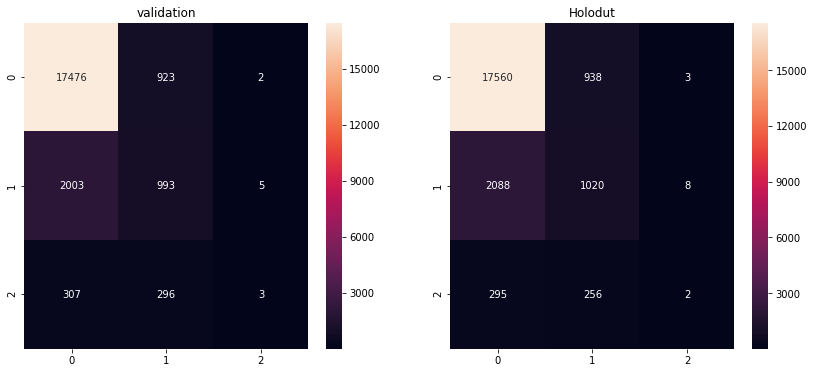

In [89]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

adjustment_factors = [0,1,2]
print('Accuracy on validation -' + str(accuracy_score(Y_validate,
                                                      adjusted_preds(xgb_classifier,
                                                                     X_validate,
                                                                     adjustment_factors))))

print('Accuracy on holdout -' + str(accuracy_score(Y_holdout,
                                                   adjusted_preds(xgb_classifier,
                                                                  X_holdout,
                                                                  adjustment_factors))))

cm_holdout = confusion_matrix(Y_validate,adjusted_preds(xgb_classifier,
                                                        X_validate,
                                                        adjustment_factors))
sns.heatmap(cm_holdout,annot=True,fmt = 'd',cbar=True,ax = ax1)
ax1.set_title('validation')


cm_holdout = confusion_matrix(Y_holdout,adjusted_preds(xgb_classifier,
                                                       X_holdout,
                                                       adjustment_factors))

sns.heatmap(cm_holdout,annot=True,fmt = 'd',cbar=True,ax = ax2)
ax2.set_title('Holodut')

Calibration of predicted probs (similar to above but with inbuilt libraries)

In [90]:
from sklearn.calibration import CalibratedClassifierCV


param = {
    'learning_rate': 0.05, 
    'max_depth': 4,  
    'colsample_bytree': 1,
    'subsample': 0.9,
    'min_child_weight': 20,
    'objective': 'multi:softprob',
    'booster': 'gbtree',
    'verbosity': 1,
    'random_state': 0,
    'n_estimators' : 500
    } 


classifier = xgb.XGBClassifier(**param)

calibrator = CalibratedClassifierCV(classifier,method = 'sigmoid' , cv = 5)

calibrator.fit(X_train,Y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=None,
                                                    booster='gbtree',
                                                    colsample_bylevel=None,
                                                    colsample_bynode=None,
                                                    colsample_bytree=1,
                                                    gamma=None, gpu_id=None,
                                                    importance_type='gain',
                                                    interaction_constraints=None,
                                                    learning_rate=0.05,
                                                    max_delta_step=None,
                                                    max_depth=4,
                                                    min_child_weight=20,
                                                    missing=nan,
                                                    mon

In [91]:
accuracy_score(Y_holdout,calibrator.predict(X_holdout))

0.8434370771312585

### Use sample weights to adjust for minor classes

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

def generate_weights_array(y,class_weights):
    weights_array = np.full(len(y),1.0)
    weights_array[y == 0] = class_weights[0]
    weights_array[y == 1] = class_weights[1]
    weights_array[y == 2] = class_weights[2]
    return(weights_array)



xgb_classifier = xgb.XGBClassifier(**param)

# weights = compute_class_weights
weights = [1,3,8]

xgb_classifier.fit(X_train,Y_train, eval_set=[(X_validate, Y_validate)],
               eval_metric=['mlogloss'],
               sample_weight = generate_weights_array(Y_train,weights),
               early_stopping_rounds = 50,
               verbose=50)


[0]	validation_0-mlogloss:1.06597
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[50]	validation_0-mlogloss:0.59354


In [ ]:
validate_preds = xgb_classifier.predict(X_validate)
holdout_preds = xgb_classifier.predict(X_holdout)

accuracy_baseline = accuracy_score(Y_holdout,np.full(len(Y_holdout),0))

accuracy_validation = accuracy_score(Y_validate,validate_preds)
accuracy_holdout = accuracy_score(Y_holdout,holdout_preds)

print('Baseline accuracy - ' +str(accuracy_baseline))
print('Accuracy on validation set - ' + str(accuracy_validation))
print('Accuracy on holdout set - ' +str(accuracy_holdout))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

cm_validate = confusion_matrix(Y_validate,validate_preds)
sns.heatmap(cm_validate,annot=True,fmt = 'd',cbar=True,ax = ax1)
ax1.set_title('Validation')

cm_holdout = confusion_matrix(Y_holdout,holdout_preds)
sns.heatmap(cm_holdout,annot=True,fmt = 'd',cbar=True, ax = ax2)
ax2.set_title('holdout')


#### Regression

In [50]:
param = {
    'learning_rate': 0.05, 
    'max_depth': 4,  
    'colsample_bytree': 1,
    'subsample': 0.75,
    'min_child_weight': 20,
    'objective': 'reg:gamma',
    'booster': 'gbtree',
    'verbosity': 1,
    'random_state': 0,
    'n_estimators' : 500,
    'base_score' : 1
    } 

regressor = xgb.XGBRegressor(**param)

regressor.fit(X_train,Y_train, eval_set=[(X_validate, Y_validate)],
               eval_metric=['rmsle'],
               early_stopping_rounds = 50,
               verbose=50)


[0]	validation_0-rmsle:0.45423
Will train until validation_0-rmsle hasn't improved in 50 rounds.
[50]	validation_0-rmsle:0.26157
[100]	validation_0-rmsle:0.26034
[150]	validation_0-rmsle:0.26027
Stopping. Best iteration:
[137]	validation_0-rmsle:0.26000



XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=20, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, subsample=0.75, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [51]:
thresh = pd.DataFrame(regressor.predict(X_validate),Y_validate).reset_index()
thresh.columns = ['class','val']
thresh.groupby(['class'])['val'].mean()

class
0    0.141880
1    0.342125
2    0.447395
Name: val, dtype: float32

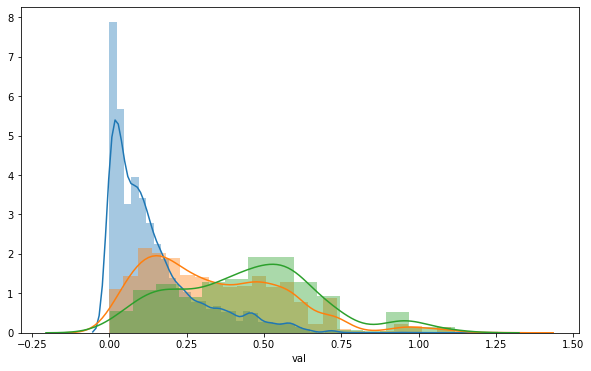

In [52]:
plt.figure(figsize=(10, 6))
sns.distplot(thresh.val[thresh['class'] == 0])
sns.distplot(thresh.val[thresh['class'] == 1])
sns.distplot(thresh.val[thresh['class'] == 2])

In [53]:
def classify_damage_regression(pred, threshold_1, threshold_2):
    pred[pred > threshold_2 ] = 2
    pred[(pred <= threshold_2) & (pred >= threshold_1)] = 1
    pred[pred < threshold_1] = 0
    return(pred)

In [54]:
accuracy_score(Y_validate,classify_damage_regression(regressor.predict(X_validate),0.5,0.75))

0.8379225736095965

### idea3 : 2 models - one to predict damage, other to predict type

In [55]:
train_binary = train
train_binary['damage'] = 0
train_binary.loc[train_binary.Crop_Damage>0,'damage'] = 1
train_binary['pesticide_damage'] = 0
train_binary.loc[train_binary.Crop_Damage>1,'pesticide_damage'] = 1

In [56]:
exclusions_binary = ['ID','Pesticide_Use_Category','id','Crop_Damage','damage','pesticide_damage']

test_exclusions_binary  = ['ID','Pesticide_Use_Category','id']

np.random.seed(0)
train_binary['holdout'] = np.random.random(len(train_binary.index))
train_binary.loc[train_binary.holdout > 0.75,'holdout'] = 1
train_binary.loc[train_binary.holdout <= 0.75,'holdout'] = 0

holdout_binary = train_binary.loc[train_binary.holdout ==1 , :].drop('holdout',axis =1)
train_binary_ = train_binary.loc[train_binary.holdout == 0 , :].drop('holdout',axis =1)

X_train, X_validate, Y_train, Y_validate = train_test_split(train_binary_.drop(exclusions_binary,axis=1),
                                                    train_binary_['damage'], test_size=0.33,random_state = 1)

X_holdout_binary = holdout_binary.drop(exclusions_binary,axis =1)
Y_holdout_binary = holdout_binary['damage']

print(X_train.shape)
print(X_validate.shape)
print(X_holdout.shape)

(44680, 16)
(22008, 16)
(22170, 16)


In [57]:
def classify_damage(preds,threshold):
    preds[preds>threshold] = 1
    preds[preds<=threshold] = 0
    return(preds)

In [58]:
param = {
    'learning_rate': 0.02, 
    'max_depth': 3,  
    'colsample_bytree': 0.9,
    'subsample': 0.9,
    'min_child_weight': 20,
    'objective': 'reg:logistic',
    'booster': 'gbtree',
    'verbosity': 1,
    'random_state': 0,
    'n_estimators' : 1000
    } 


# feature_names = list(X_train.columns)

damage_classifier = xgb.XGBClassifier(**param)

damage_classifier.fit(X_train,Y_train, eval_set=[(X_validate, Y_validate)],
               eval_metric=['logloss'],
               early_stopping_rounds = 50,
               verbose=50)

validate_damage_preds = damage_classifier.predict(X_validate)
holdout_damage_preds = damage_classifier.predict(X_holdout_binary)

accuracy_validation = accuracy_score(Y_validate,validate_damage_preds)

accuracy_baseline = accuracy_score(Y_holdout,np.full(len(Y_holdout),0))

accuracy_holdout = accuracy_score(Y_holdout,holdout_damage_preds)

print('Baseline accuracy - ' +str(accuracy_baseline))
print('Accuracy on validation set - ' + str(accuracy_validation))
print('Accuracy on holdout set - ' +str(accuracy_holdout))

# submission = test[['ID']]
# submission['Crop_Damage'] = classify_damage(damage_classifier.predict_proba(test.drop(test_exclusions, axis =1))[:,1],0.45)
# submission.to_csv('binary_submission.csv', index = False)

[0]	validation_0-logloss:0.68266
Will train until validation_0-logloss hasn't improved in 50 rounds.
[50]	validation_0-logloss:0.43803
[100]	validation_0-logloss:0.38337
[150]	validation_0-logloss:0.36773
[200]	validation_0-logloss:0.36163
[250]	validation_0-logloss:0.35869
[300]	validation_0-logloss:0.35690
[350]	validation_0-logloss:0.35573
[400]	validation_0-logloss:0.35455
[450]	validation_0-logloss:0.35369
[500]	validation_0-logloss:0.35307
[550]	validation_0-logloss:0.35256
[600]	validation_0-logloss:0.35208
[650]	validation_0-logloss:0.35178
[700]	validation_0-logloss:0.35152
[750]	validation_0-logloss:0.35120
[800]	validation_0-logloss:0.35099
[850]	validation_0-logloss:0.35078
[900]	validation_0-logloss:0.35062
[950]	validation_0-logloss:0.35046
[999]	validation_0-logloss:0.35031
Baseline accuracy - 0.8345060893098782
Accuracy on validation set - 0.8592330061795711
Accuracy on holdout set - 0.84361750112765


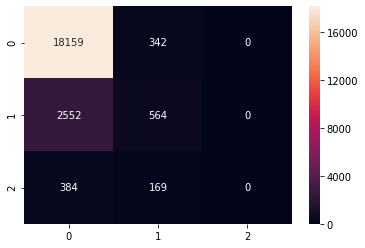

In [59]:
cm_holdout = confusion_matrix(Y_holdout,holdout_preds)
sns.heatmap(cm_holdout,annot=True,fmt = 'd',cbar=True)

In [60]:
validate_damage_preds = damage_classifier.predict_proba(X_validate)
holdout_damage_preds = damage_classifier.predict_proba(X_holdout)

accuracy_validation = accuracy_score(Y_validate,classify_damage(validate_damage_preds[:,1],0.6))

accuracy_baseline = accuracy_score(Y_holdout,np.full(len(Y_holdout),0))

accuracy_holdout = accuracy_score(Y_holdout,classify_damage(holdout_damage_preds[:,1],0.6))

print('Baseline accuracy - ' +str(accuracy_baseline))
print('Accuracy on validation set - ' + str(accuracy_validation))
print('Accuracy on holdout set - ' +str(accuracy_holdout))


Baseline accuracy - 0.8345060893098782
Accuracy on validation set - 0.8529625590694293
Accuracy on holdout set - 0.8437979251240415
